In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [55]:
data = pd.read_excel("ENB2012_data.xlsx")

# Rename columns for clarity
data.columns = [
    "Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area",
    "Overall_Height", "Orientation", "Glazing_Area", "Glazing_Area_Distribution",
    "Heating_Load", "Cooling_Load"
]

# Basic info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [56]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)
print("\n✅ No significant outliers detected.")


Outliers per column:
 Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

✅ No significant outliers detected.


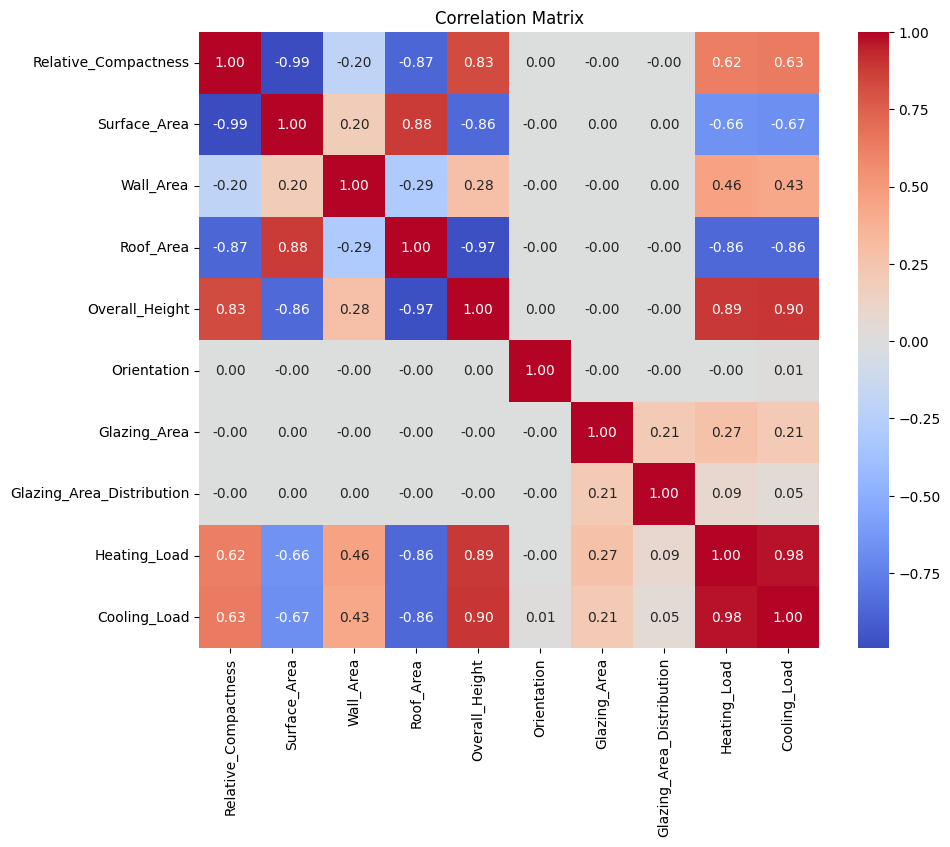

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [58]:
corr = data.corr()["Heating_Load"].drop("Heating_Load")
threshold = 0.3
selected_features = corr[abs(corr) > threshold].index.tolist()

print("Selected features (|corr| > 0.3):")
print(selected_features)

# Remove 'Cooling_Load' if included
if "Cooling_Load" in selected_features:
    selected_features.remove("Cooling_Load")

x_selected = data[selected_features]
y = data["Heating_Load"]

print("\nPreview of selected features:")
display(x_selected.head())


Selected features (|corr| > 0.3):
['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Cooling_Load']

Preview of selected features:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height
0,0.98,514.5,294.0,110.25,7.0
1,0.98,514.5,294.0,110.25,7.0
2,0.98,514.5,294.0,110.25,7.0
3,0.98,514.5,294.0,110.25,7.0
4,0.90,563.5,318.5,122.50,7.0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    x_selected, y, test_size=0.2, random_state=42
)


In [60]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly.shape)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


(614, 252)


In [61]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance Metrics:")
print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


📊 Model Performance Metrics:
MAE:  2.976
MSE:  15.686
RMSE: 3.961
R² Score: 0.850


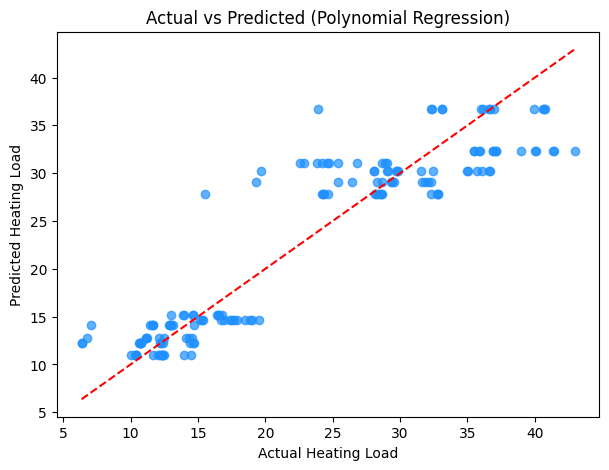

In [44]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color="dodgerblue", alpha=0.7)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [45]:
import joblib

# Save both the polynomial transformer and model
joblib.dump(poly, "poly_transformer.pkl")
joblib.dump(model, "polynomial_regression_model.pkl")

print("✅ Model and transformer saved successfully!")


✅ Model and transformer saved successfully!
